In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/home/krishanveerdata/ib/Projects/Dataset/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(columns=['Id'],inplace=True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.shape

(150, 5)

In [9]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Checking For Null Values

In [10]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Checking for Duplicate Values

In [11]:
df.duplicated().sum()

3

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

Expolatory Data Analysis

Text(0.5, 1.0, 'Relationship between Sepal Length and Width')

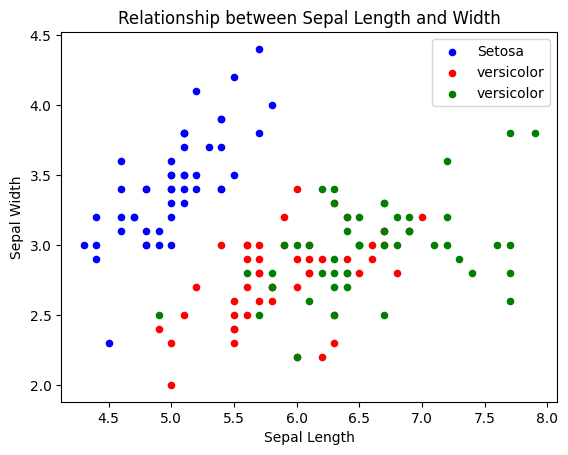

In [14]:
ax = df[df['Species'] == 'Iris-setosa'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='red', label='versicolor',ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='green', label='versicolor',ax=ax)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Relationship between Sepal Length and Width")

Text(0.5, 1.0, 'Relationship between Sepal Length and Width')

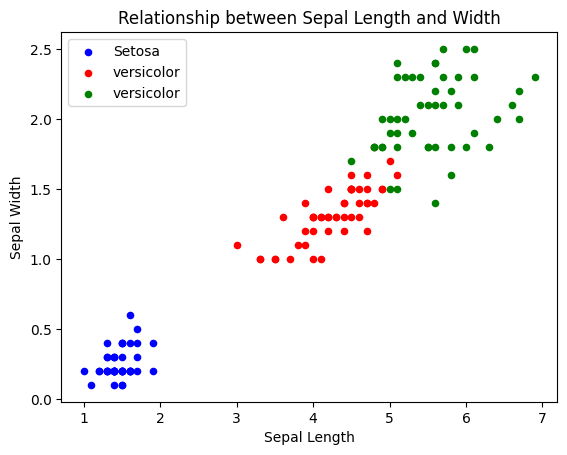

In [15]:
ax = df[df['Species'] == 'Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='red', label='versicolor',ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='versicolor',ax=ax)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Relationship between Sepal Length and Width")

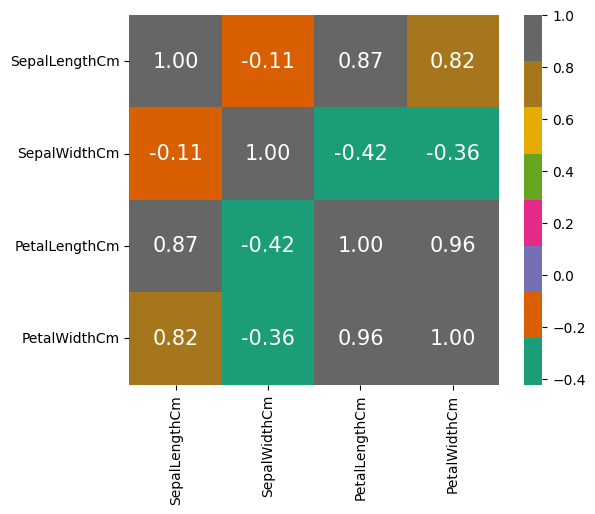

In [16]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm',]
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

From the above matrix it is seen that Petal Length and Width show a strong coorelation whereas the Sepal Length and Width show weak correlations, it indicates that the Species can be identified better using Petal compared to Sepal,we will verify the same using Machine Learning

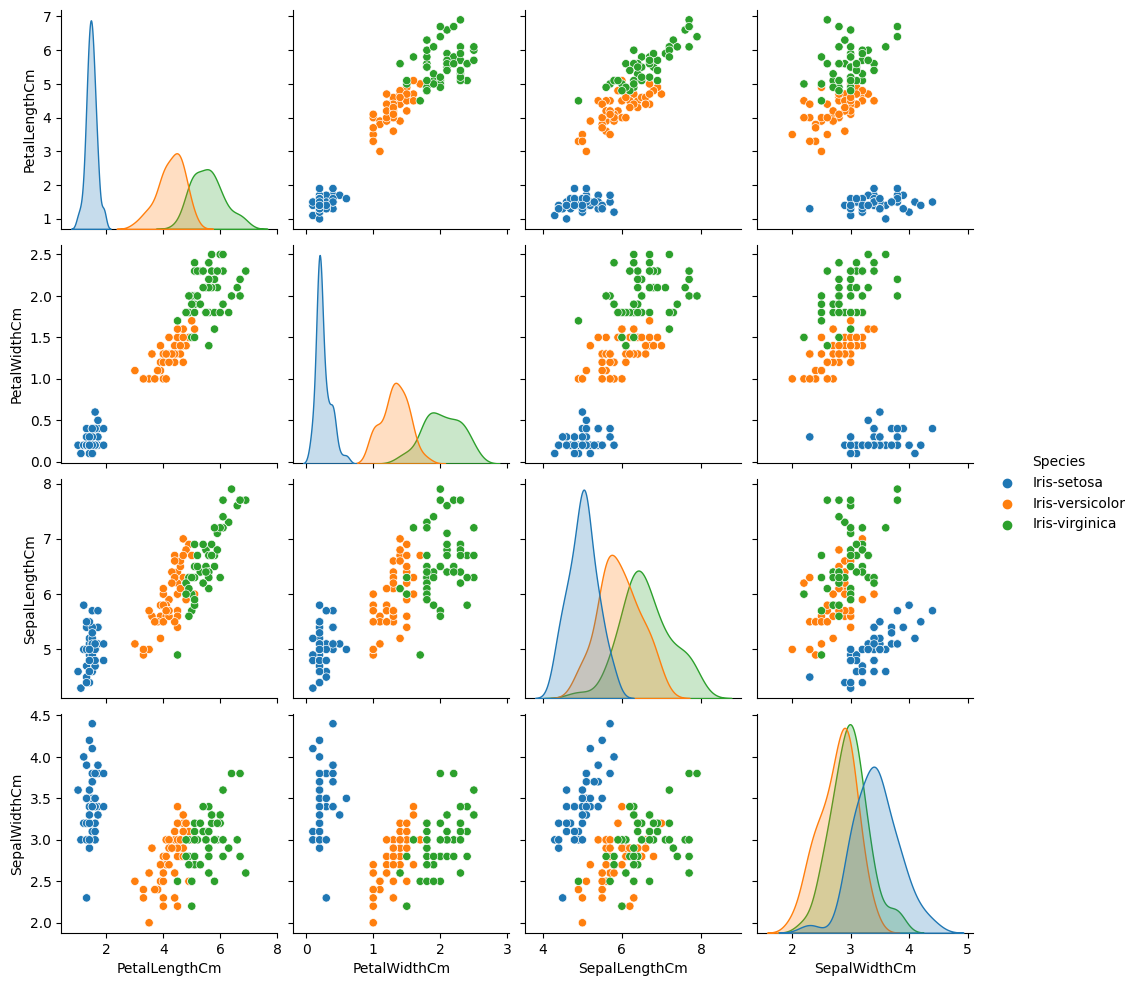

In [17]:
sns.pairplot(df[['PetalLengthCm','PetalWidthCm','SepalLengthCm','SepalWidthCm','Species']],hue='Species')

In [18]:
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [19]:
y = df[['Species']]
X = df[['PetalLengthCm','PetalWidthCm','SepalLengthCm','SepalWidthCm']]

Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [21]:
X_std = std.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.2,random_state=1)

Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier(criterion='gini',max_depth=4)

In [24]:
Dtc.fit(X_train,y_train)
d_pred = Dtc.predict(X_test)
print('Training Accuracy Sepal = {}'.format(Dtc.score(X_train, y_train)))
print('Testing  Accuracy Sepal = {}'.format(Dtc.score(X_test, y_test)))

Training Accuracy Sepal = 1.0
Testing  Accuracy Sepal = 0.9333333333333333


In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, d_pred)))

Model accuracy score: 0.9333


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [27]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(Dtc , X_train,y_train,cv=3,scoring='accuracy')
print(cross_score.mean())

0.9572649572649571


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,d_pred)

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  7]])

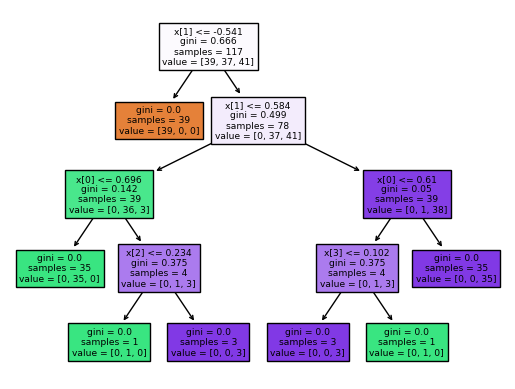

In [29]:
from sklearn import tree
tree.plot_tree(Dtc,filled=True)
plt.show()

K-Nearest Neighbour

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
print('Training Accuracy Sepal = {}'.format(model.score(X_train, y_train)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test, y_test)))

Training Accuracy Sepal = 0.9487179487179487
Testing  Accuracy Sepal = 0.9333333333333333


/home/krishanveerdata/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [31]:
k_pred = model.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, k_pred)))

Model accuracy score: 0.9333


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, k_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [33]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(model, X_train,y_train,cv=3,scoring='accuracy')
print(cross_score.mean())

0.9487179487179486


/home/krishanveerdata/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/krishanveerdata/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/krishanveerdata/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


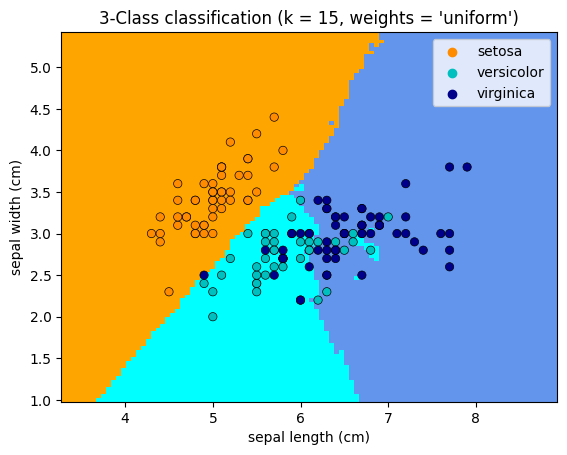

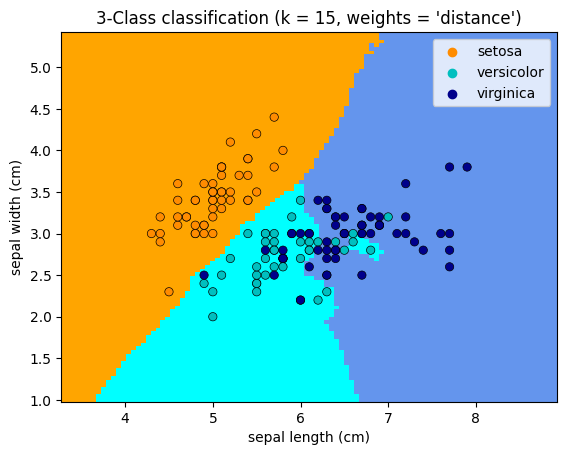

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

Naive Bayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
print('Training Accuracy Sepal = {}'.format(gnb.score(X_train, y_train)))
print('Testing  Accuracy Sepal = {}'.format(gnb.score(X_test, y_test)))

Training Accuracy Sepal = 0.9658119658119658
Testing  Accuracy Sepal = 0.9


/home/krishanveerdata/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
y_pred = gnb.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica'],
      dtype='<U15')

In [37]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9000


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.78      0.88      0.82         8

       accuracy                           0.90        30
      macro avg       0.90      0.91      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [39]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(gnb, X_train,y_train,cv=3,scoring='accuracy')
print(cross_score.mean())

0.9487179487179486


/home/krishanveerdata/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/krishanveerdata/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/krishanveerdata/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_lb = lb.fit_transform(y)

Accuracy of Model After Removing PetalLengthCm 

In [41]:
Dtc.fit(X_train[:,1:],y_train)
d_pred = Dtc.predict(X_test[:,1:])
print('Training Accuracy Sepal = {}'.format(Dtc.score(X_train[:,1:], y_train)))
print('Testing  Accuracy Sepal = {}'.format(Dtc.score(X_test[:,1:], y_test)))

Training Accuracy Sepal = 0.9829059829059829
Testing  Accuracy Sepal = 0.9333333333333333


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



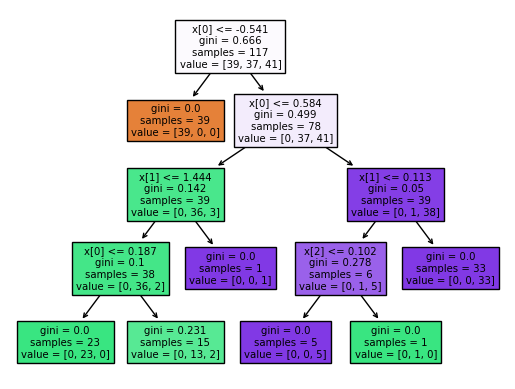

In [43]:
from sklearn import tree
tree.plot_tree(Dtc,filled=True)
plt.show()